In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow_hub as hub
import matplotlib.pylab as plt
from __future__ import absolute_import, division, print_function, unicode_literals
np.random.seed(0)
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
#drive.flush_and_unmount()

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!unzip gdrive/My\ Drive/Project_4/stanford_dogs.zip

In [ ]:
import os

# Path to the zip file
zip_file_path = '/content/gdrive/MyDrive/Project_4/stanford_dogs/cropped/test/n02116738-African_hunting_dog/n02116738_8945.jpg'

# Verify if the zip file exists
if os.path.exists(zip_file_path):
    print("Zip file exists.")
else:
    print("Zip file does not exist. Please check the file path.")

Zip file exists.


In [ ]:
data_root = '/content/gdrive/MyDrive/Project_4/stanford_dogs/cropped/train'

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="validation",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="training",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )

/content/gdrive/MyDrive/Project_4/stanford_dogs/cropped/train
Found 2400 images belonging to 120 classes.
Found 9600 images belonging to 120 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 120)
['N02085620-Chihuahua' 'N02085782-Japanese_Spaniel'
 'N02085936-Maltese_Dog' 'N02086079-Pekinese' 'N02086240-Shih-Tzu'
 'N02086646-Blenheim_Spaniel' 'N02086910-Papillon' 'N02087046-Toy_Terrier'
 'N02087394-Rhodesian_Ridgeback' 'N02088094-Afghan_Hound'
 'N02088238-Basset' 'N02088364-Beagle' 'N02088466-Bloodhound'
 'N02088632-Bluetick' 'N02089078-Black-And-Tan_Coonhound'
 'N02089867-Walker_Hound' 'N02089973-English_Foxhound' 'N02090379-Redbone'
 'N02090622-Borzoi' 'N02090721-Irish_Wolfhound'
 'N02091032-Italian_Greyhound' 'N02091134-Whippet'
 'N02091244-Ibizan_Hound' 'N02091467-Norwegian_Elkhound'
 'N02091635-Otterhound' 'N02091831-Saluki' 'N02092002-Scottish_Deerhound'
 'N02092339-Weimaraner' 'N02093256-Staffordshire_Bullterrier'
 'N02093428-American_Staffordshire_Terrier' 'N02093647-Bedlington_Terrier'
 'N02093754-Border_Terrier' 'N02093859-Kerry_Blue_Terrier'
 'N02093991-Irish_Terrier' 'N02094114-Norfolk_Terrier'
 'N0

In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2411704 (9.20 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
300/300 [==============================] - 470s 2s/step - loss: 1.6255 - acc: 0.6020 - val_loss: 0.6830 - val_acc: 0.8079
Epoch 2/10
300/300 [==============================] - 466s 2s/step - loss: 0.5804 - acc: 0.8283 - val_loss: 0.6000 - val_acc: 0.8146
Epoch 3/10
300/300 [==============================] - 466s 2s/step - loss: 0.4369 - acc: 0.8658 - val_loss: 0.5614 - val_acc: 0.8154
Epoch 4/10
300/300 [==============================] - 514s 2s/step - loss: 0.3437 - acc: 0.8938 - val_loss: 0.5503 - val_acc: 0.8229
Epoch 5/10
300/300 [==============================] - 504s 2s/step - loss: 0.2794 - acc: 0.9146 - val_loss: 0.5515 - val_acc: 0.8246
Epoch 6/10
300/300 [==============================] - 511s 2s/step - loss: 0.2334 - acc: 0.9317 - val_loss: 0.5502 - val_acc: 0.8279
Epoch 7/10
300/300 [==============================] - 523s 2s/step - loss: 0.2021 - acc: 0.9389 - val_loss: 0.5638 - val_acc: 0.8267
Epoch 8/10
300/300 [==============================] - 523s 2s/step - 

In [ ]:
saved_model_path = "/content/gdrive/MyDrive/Project_4/dog_model_2.h5"
#model.save(saved_model_path) #save your model

# to reload the model

model = tf.keras.models.load_model(
       (saved_model_path),
       custom_objects={'KerasLayer':hub.KerasLayer}
)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Project_4/misc_dogs/Saint_Bernard.jpg')
img = cv2.resize(img,(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)


predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)
dataset_labels[predicted_class]

1/1 [==============================] - 0s 37ms/step
Predicted class: [96]


array(['N02109525-Saint_Bernard'], dtype='<U40')

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
pd.set_option('display.max_columns', None)
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head(1)

1/1 [==============================] - 1s 651ms/step
Prediction results for the first elements


,N02085620-Chihuahua,N02085782-Japanese_Spaniel,N02085936-Maltese_Dog,N02086079-Pekinese,N02086240-Shih-Tzu,N02086646-Blenheim_Spaniel,N02086910-Papillon,N02087046-Toy_Terrier,N02087394-Rhodesian_Ridgeback,N02088094-Afghan_Hound,N02088238-Basset,N02088364-Beagle,N02088466-Bloodhound,N02088632-Bluetick,N02089078-Black-And-Tan_Coonhound,N02089867-Walker_Hound,N02089973-English_Foxhound,N02090379-Redbone,N02090622-Borzoi,N02090721-Irish_Wolfhound,N02091032-Italian_Greyhound,N02091134-Whippet,N02091244-Ibizan_Hound,N02091467-Norwegian_Elkhound,N02091635-Otterhound,N02091831-Saluki,N02092002-Scottish_Deerhound,N02092339-Weimaraner,N02093256-Staffordshire_Bullterrier,N02093428-American_Staffordshire_Terrier,N02093647-Bedlington_Terrier,N02093754-Border_Terrier,N02093859-Kerry_Blue_Terrier,N02093991-Irish_Terrier,N02094114-Norfolk_Terrier,N02094258-Norwich_Terrier,N02094433-Yorkshire_Terrier,N02095314-Wire-Haired_Fox_Terrier,N02095570-Lakeland_Terrier,N02095889-Sealyham_Terrier,N02096051-Airedale,N02096177-Cairn,N02096294-Australian_Terrier,N02096437-Dandie_Dinmont,N02096585-Boston_Bull,N02097047-Miniature_Schnauzer,N02097130-Giant_Schnauzer,N02097209-Standard_Schnauzer,N02097298-Scotch_Terrier,N02097474-Tibetan_Terrier,N02097658-Silky_Terrier,N02098105-Soft-Coated_Wheaten_Terrier,N02098286-West_Highland_White_Terrier,N02098413-Lhasa,N02099267-Flat-Coated_Retriever,N02099429-Curly-Coated_Retriever,N02099601-Golden_Retriever,N02099712-Labrador_Retriever,N02099849-Chesapeake_Bay_Retriever,N02100236-German_Short-Haired_Pointer,N02100583-Vizsla,N02100735-English_Setter,N02100877-Irish_Setter,N02101006-Gordon_Setter,N02101388-Brittany_Spaniel,N02101556-Clumber,N02102040-English_Springer,N02102177-Welsh_Springer_Spaniel,N02102318-Cocker_Spaniel,N02102480-Sussex_Spaniel,N02102973-Irish_Water_Spaniel,N02104029-Kuvasz,N02104365-Schipperke,N02105056-Groenendael,N02105162-Malinois,N02105251-Briard,N02105412-Kelpie,N02105505-Komondor,N02105641-Old_English_Sheepdog,N02105855-Shetland_Sheepdog,N02106030-Collie,N02106166-Border_Collie,N02106382-Bouvier_Des_Flandres,N02106550-Rottweiler,N02106662-German_Shepherd,N02107142-Doberman,N02107312-Miniature_Pinscher,N02107574-Greater_Swiss_Mountain_Dog,N02107683-Bernese_Mountain_Dog,N02107908-Appenzeller,N02108000-Entlebucher,N02108089-Boxer,N02108422-Bull_Mastiff,N02108551-Tibetan_Mastiff,N02108915-French_Bulldog,N02109047-Great_Dane,N02109525-Saint_Bernard,N02109961-Eskimo_Dog,N02110063-Malamute,N02110185-Siberian_Husky,N02110627-Affenpinscher,N02110806-Basenji,N02110958-Pug,N02111129-Leonberg,N02111277-Newfoundland,N02111500-Great_Pyrenees,N02111889-Samoyed,N02112018-Pomeranian,N02112137-Chow,N02112350-Keeshond,N02112706-Brabancon_Griffon,N02113023-Pembroke,N02113186-Cardigan,N02113624-Toy_Poodle,N02113712-Miniature_Poodle,N02113799-Standard_Poodle,N02113978-Mexican_Hairless,N02115641-Dingo,N02115913-Dhole,N02116738-African_Hunting_Dog
0,0.000001,1.208848e-08,0.000002,5.172872e-07,0.000002,1.512648e-07,1.509534e-07,1.432011e-07,3.440545e-10,0.000014,9.487815e-08,2.267644e-08,9.383638e-10,1.160435e-08,1.373340e-09,3.180069e-08,2.230334e-08,1.591496e-08,4.602715e-08,2.575333e-08,3.343444e-08,2.660231e-09,1.063642e-10,9.237710e-08,5.157193e-09,1.228809e-07,3.759282e-10,1.195064e-07,6.006345e-09,3.035662e-10,3.596355e-07,8.537405e-09,6.863606e-08,1.430065e-07,3.413721e-08,1.006526e-08,4.595329e-08,6.222724e-08,1.291331e-07,1.171839e-07,2.234519e-09,6.316090e-08,1.314672e-08,8.045027e-08,4.514308e-09,1.208953e-07,1.301031e-09,1.088952e-08,2.751998e-09,7.803317e-08,2.273404e-08,0.000002,7.320754e-09,0.000001,7.549355e-08,8.920945e-08,1.110184e-08,8.714461e-09,6.005863e-09,2.070606e-08,1.107438e-08,0.000001,2.522532e-08,5.035347e-08,4.332982e-08,8.776740e-07,1.090045e-08,1.791255e-07,0.000014,4.034708e-09,0.000002,0.000005,1.985381e-08,2.399599e-09,1.692078e-09,8.720630e-09,4.240774e-10,8.482915e-07,2.504065e-07,4.257739e-09,1.680505e-10,7.729027e-09,2.385176e-08,5.813823e-10,6.173868e-10,6.014676e-10,1.215110

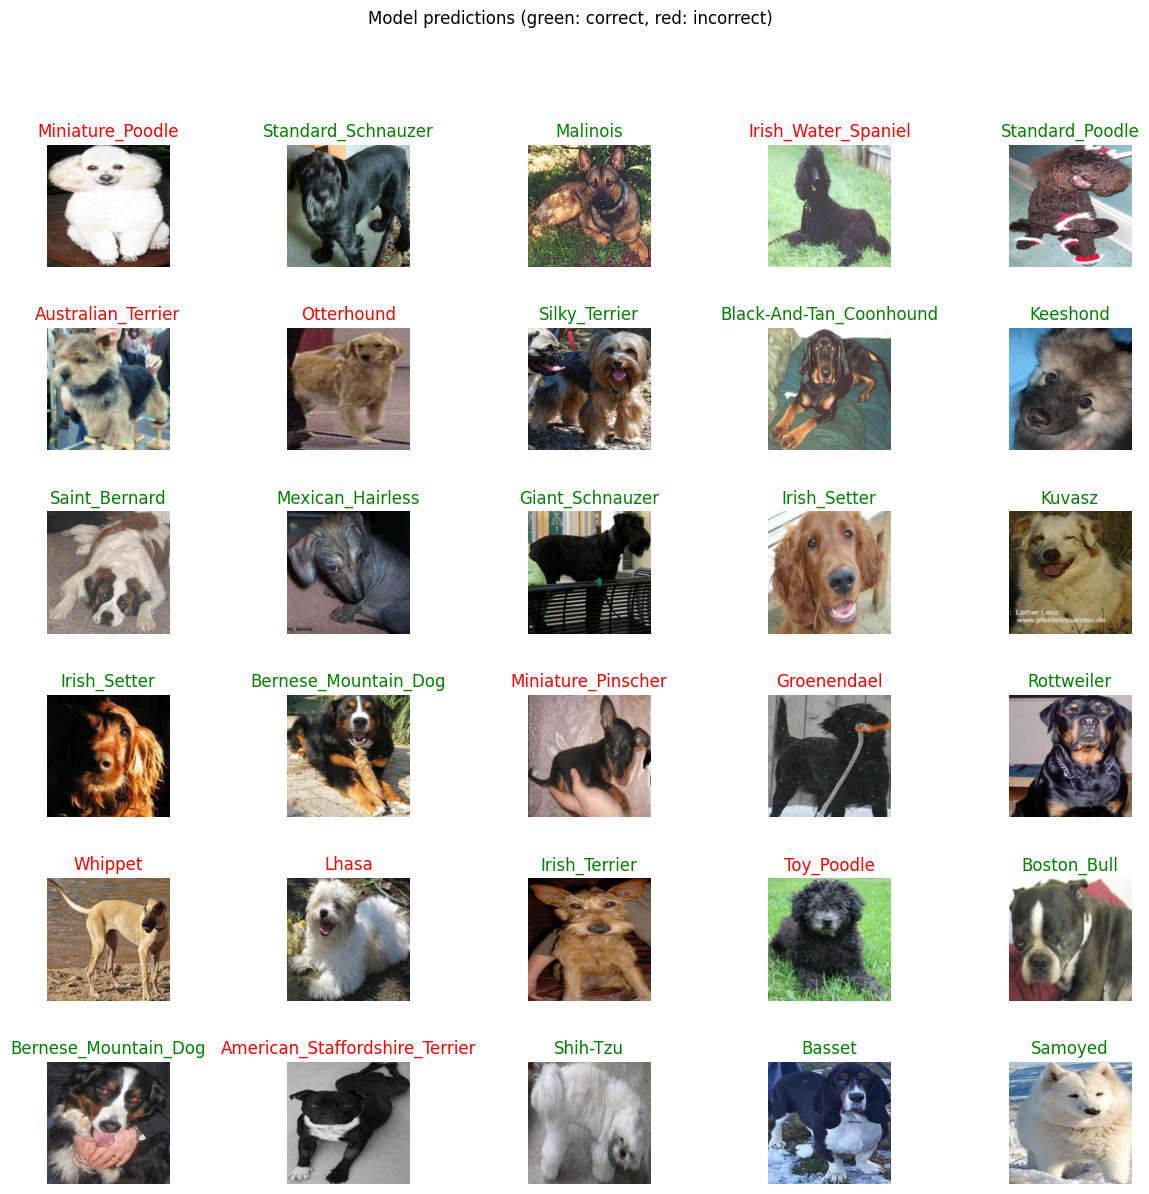

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(15,13.5))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title().split("-",1)[1], color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")